## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [85]:
df = pd.read_csv('Programming Languages Over Time.csv', names=['DATE', 'TAG', 'COUNT'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [86]:
print(df.head())
print(df.tail())

                  DATE       TAG  COUNT
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    504
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  COUNT
2588  2024-02-01 00:00:00     php   1428
2589  2024-02-01 00:00:00  python   8379
2590  2024-02-01 00:00:00       r   1854
2591  2024-02-01 00:00:00    ruby    160
2592  2024-02-01 00:00:00   swift    708


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [87]:
df.shape

(2593, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [88]:
df.count()

DATE     2593
TAG      2593
COUNT    2593
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [89]:
tags = df.groupby('TAG')
print(tags.sum().sort_values('COUNT'))

                                                         DATE    COUNT
TAG                                                                   
assembly    2008-08-01 00:00:002008-09-01 00:00:002008-10-...    44045
delphi      2008-08-01 00:00:002008-09-01 00:00:002008-10-...    51745
perl        2008-08-01 00:00:002008-09-01 00:00:002008-10-...    68052
go          2009-11-01 00:00:002009-12-01 00:00:002010-01-...    72423
ruby        2008-08-01 00:00:002008-09-01 00:00:002008-10-...   228908
swift       2009-01-01 00:00:002009-02-01 00:00:002009-03-...   332611
c           2008-08-01 00:00:002008-09-01 00:00:002008-10-...   403075
r           2008-09-01 00:00:002008-11-01 00:00:002008-12-...   503799
c++         2008-08-01 00:00:002008-09-01 00:00:002008-10-...   805079
php         2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1462795
c#          2008-07-01 00:00:002008-08-01 00:00:002008-09-...  1612141
java        2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1914086
python

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [90]:
df.value_counts('TAG')

TAG
c#            188
assembly      187
c             187
c++           187
delphi        187
java          187
javascript    187
perl          187
php           187
python        187
ruby          187
r             185
swift         178
go            172
Name: count, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [91]:
df.DATE = pd.to_datetime(df.DATE)

## Data Manipulation



In [92]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='COUNT')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [93]:
reshaped_df.shape

(188, 14)

In [94]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [95]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [96]:
reshaped_df.count()

TAG
assembly      187
c             187
c#            188
c++           187
delphi        187
go            172
java          187
javascript    187
perl          187
php           187
python        187
r             185
ruby          187
swift         178
dtype: int64

In [97]:
reshaped_df.fillna(0, inplace=True)

In [98]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,604.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,497.0,448.0,1.0,157.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

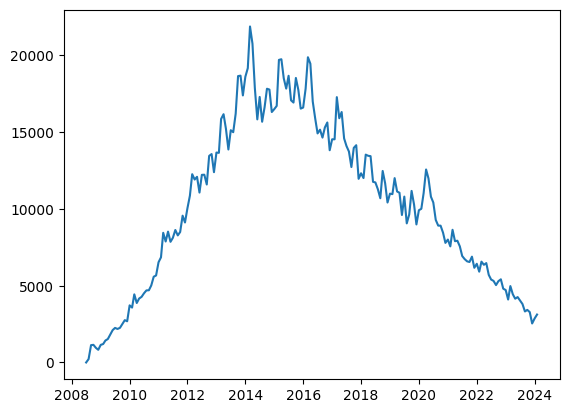

In [99]:
plt.plot(reshaped_df['java'])

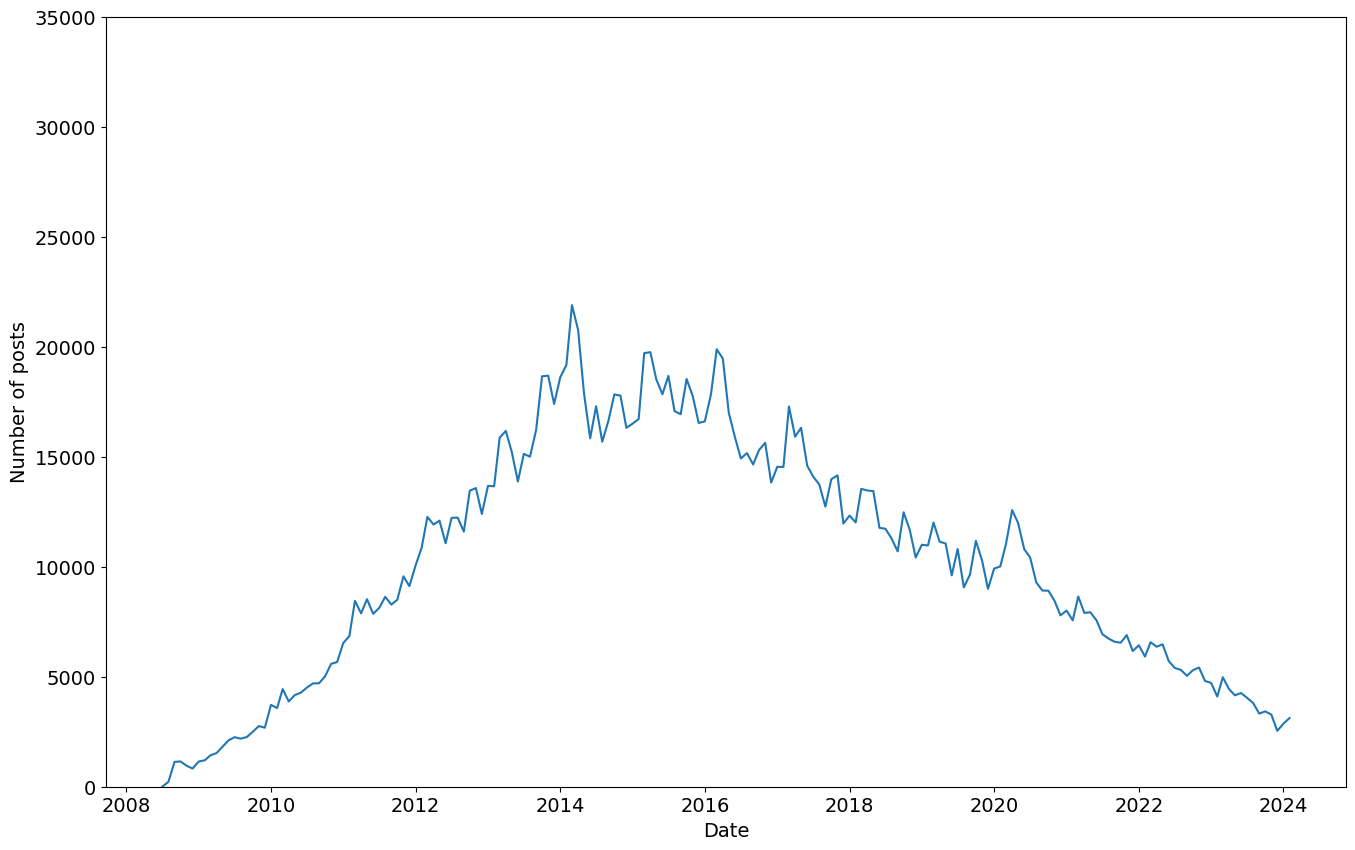

In [100]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

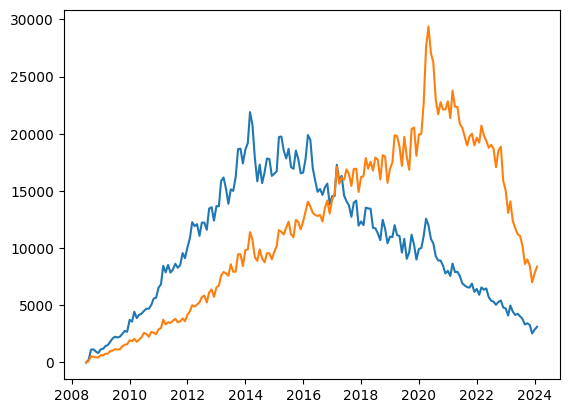

In [101]:
plt.plot(reshaped_df['java'])
plt.plot(reshaped_df['python'])

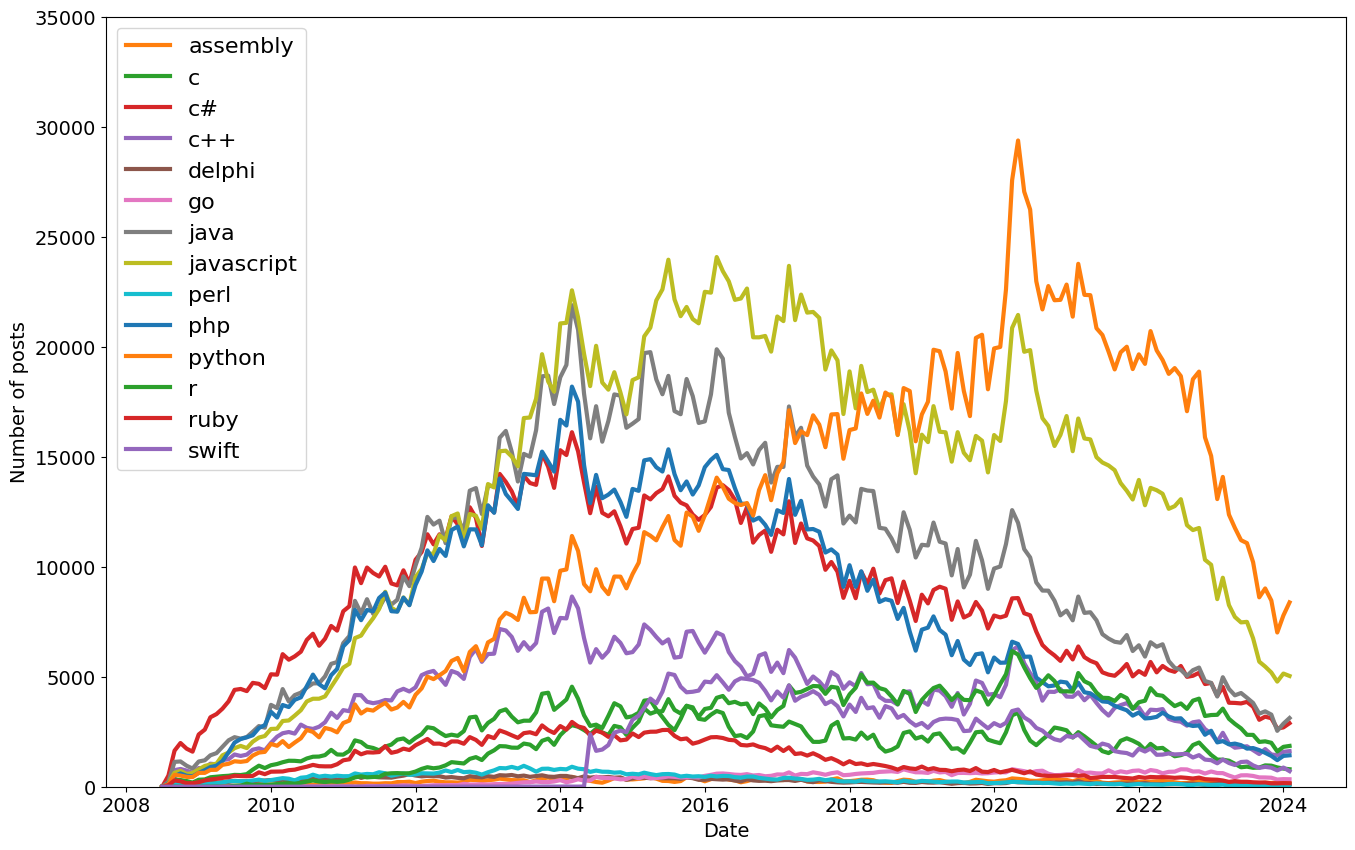

In [109]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df['java'])
for column in reshaped_df:
    plt.plot(reshaped_df[column], linewidth=3, label=column)
    plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

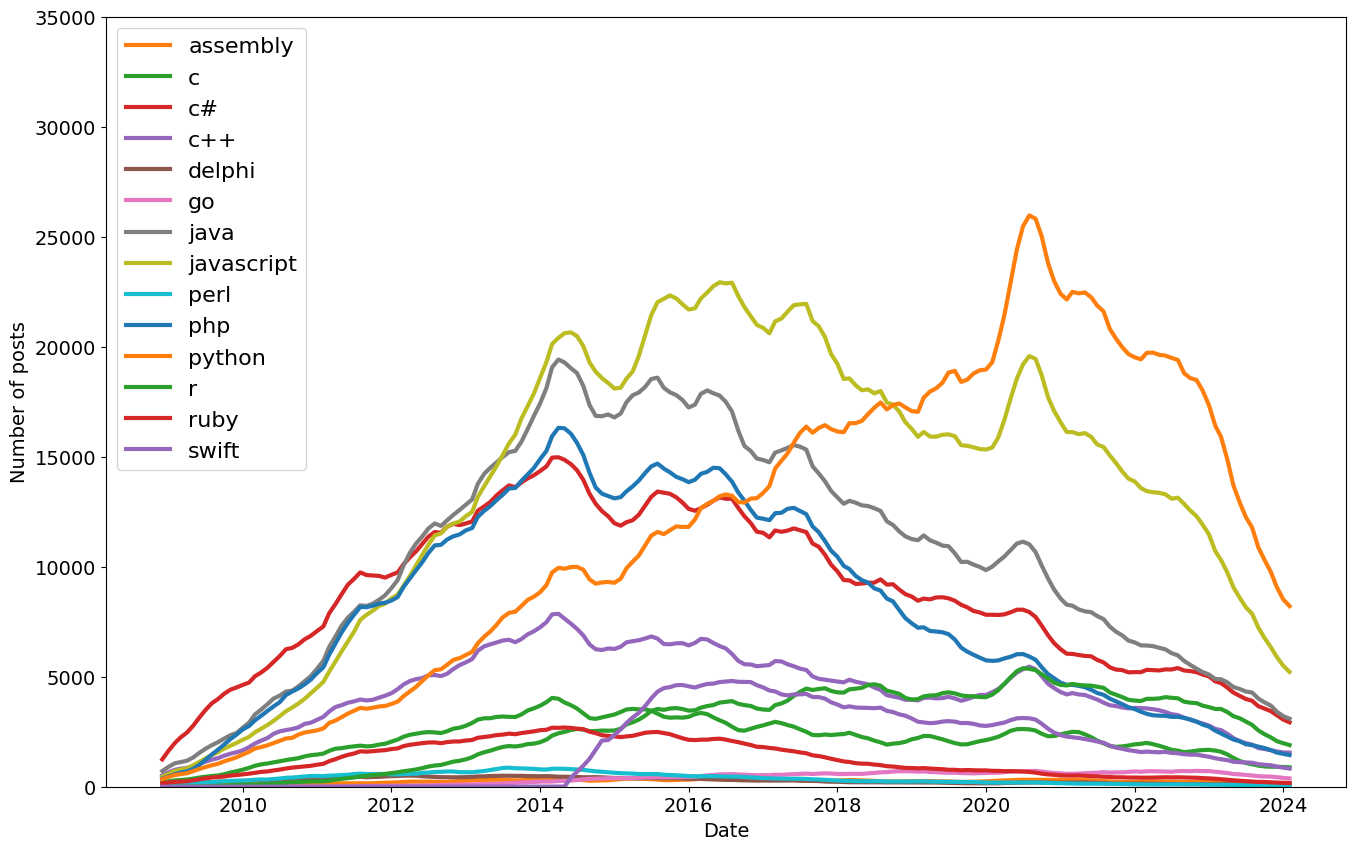

In [125]:
rolling_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(rolling_df['java'])
for column in rolling_df:
    plt.plot(rolling_df[column], linewidth=3, label=column)
    plt.legend(fontsize=16)